# FastText 한국어 사용하기

코어닷투데이 김경훈 20230914

# 그림 작성을 위한 한글 폰트 설치
설치하고 런타임 다시 시작을 해주세요

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,720 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and dire

In [ ]:
%matplotlib inline

In [ ]:
import os
import gensim

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

아래 url에서 모델을 다운받으세요.

- https://fasttext.cc/docs/en/crawl-vectors.html

- `.vec` 파일은 라인마다 단어에 대한 vector가 있는 형태
- `.bin` 파일은 벡터 뿐만 아니라 dictionary와 모델의 하이퍼 파라미터와 같은 정보들이 모두 들어있는 형태

In [ ]:
url = "https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ko.300.bin.gz"

In [ ]:
!wget $url

--2023-09-14 05:23:37--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ko.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 99.84.208.60, 99.84.208.90, 99.84.208.25, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|99.84.208.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4486458164 (4.2G) [application/octet-stream]
Saving to: ‘cc.ko.300.bin.gz’

cc.ko.300.bin.gz    100%[===================>]   4.18G  19.9MB/s    in 3m 20s  

2023-09-14 05:26:58 (21.4 MB/s) - ‘cc.ko.300.bin.gz’ saved [4486458164/4486458164]



gz 압축을 풀어줍시다. 일반 압축프로그램으로 압축을 풀어서 별개의 bin 파일을 사용하셔도 되요!

In [ ]:
!gzip -d cc.ko.300.bin.gz

In [ ]:
from gensim import models

ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin')

ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa1\x9c'; replacing invalid characters, using '\\xed\\xa1\\x9c'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb0\x80'; replacing invalid characters, using '\\xed\\xb0\\x80'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa7\x80'; replacing invalid characters, using '\\xed\\xa7\\x80'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb8\xb0'; replacing invalid characters, using '\\xed\\xb8\\xb0'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa0\x9c'; replacing invalid characters, using '\\xed\\xa0\\x9c'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa6\xac'; replacing invalid characters, using '\\xed\\xa6\\xac'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb3\xb5'; replacing invalid characters, using '\\xed\\xb

# 메모리 사이즈가 작다면 wikipedia 한국어 모델을 써봅시다

- https://fasttext.cc/docs/en/pretrained-vectors.html

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ko.zip

--2023-09-14 05:38:55--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ko.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 99.84.208.60, 99.84.208.25, 99.84.208.36, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|99.84.208.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5095072144 (4.7G) [application/zip]
Saving to: ‘wiki.ko.zip’

wiki.ko.zip         100%[===================>]   4.75G  21.4MB/s    in 3m 32s  

2023-09-14 05:42:28 (22.9 MB/s) - ‘wiki.ko.zip’ saved [5095072144/5095072144]



In [ ]:
!unzip wiki.ko.zip

Archive:  wiki.ko.zip
  inflating: wiki.ko.bin             
  inflating: wiki.ko.vec             


In [ ]:
from gensim import models

ko_model = models.fasttext.load_facebook_model('wiki.ko.bin')

In [ ]:
ko_model

In [ ]:
for w, sim in ko_model.wv.similar_by_word('파이썬', 10):
    print(f'{w}: {sim}')

파이썬이: 0.8981545567512512
파이썬은: 0.8964813351631165
파이썬과: 0.8900295495986938
파이썬을: 0.8891832828521729
파이썬에: 0.8743370771408081
파이썬의: 0.8634340167045593
파이썬에서: 0.8615654110908508
파이썬으로: 0.8568466901779175
사이썬: 0.8504716753959656
파이썬에서는: 0.8454942107200623


In [ ]:
for w, sim in ko_model.wv.similar_by_word('고구마', 10):
    print(f'{w}: {sim}')

고구마와: 0.8452924489974976
군고구마: 0.8450864553451538
고구마의: 0.8381970524787903
고구마가: 0.8230379819869995
고구마를: 0.8121134042739868
고구마는: 0.8101942539215088
시금치: 0.7505736947059631
고추나물: 0.7393064498901367
참깨: 0.7359969019889832
고추냉이: 0.7313038110733032


In [ ]:
for w, sim in ko_model.wv.similar_by_word('감자', 10):
    print(f'{w}: {sim}')

감자와: 0.8474608659744263
돼지감자: 0.8091248869895935
감자전: 0.8062297701835632
감자빵은: 0.7996994853019714
감자칩: 0.7983944416046143
감자나: 0.7977982759475708
감자튀김: 0.7921280860900879
감자가: 0.7898270487785339
감자전분: 0.7892451882362366
설탕당근: 0.7861435413360596


In [ ]:
for w, sim in ko_model.wv.similar_by_word('보온병', 10):
    print(f'{w}: {sim}')

보온병을: 0.7607376575469971
보온성: 0.6730151176452637
보온: 0.6653570532798767
용접용: 0.6342130303382874
제조원: 0.6312565803527832
식기세척기: 0.6279789805412292
세탁세제: 0.6245207786560059
커피메이커: 0.6233428120613098
유리병: 0.6222872138023376
세탁용: 0.6219345927238464


# 두 단어 사이의 유사성을 계산해 보겠습니다

In [ ]:
ko_model.wv.similarity("보온병", "고구마")

0.47313565

In [ ]:
ko_model.wv.similarity("감자", "고구마")

0.69523424

In [ ]:
ko_model.wv.similarity("고구마깡", "고구마")

0.8201763

In [ ]:
ko_model.wv.similarity("고구마맛탕", "고구마")

0.8624138

In [ ]:
ko_model.wv.similarity("고구마 튀김", "고구마")

0.8201559

In [ ]:
ko_model.wv.similarity("고구마튀김", "고구마")

0.829859

In [ ]:
ko_model.wv.similarity("튀김고구마", "고구마")

0.8403498

In [ ]:
ko_model.wv.similarity("뿌리채소", "고구마")

0.68144065

# 벡터 시각화

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
words = [
    '파이썬',
    '고구마',
    '감자',
    '보온병',
    '고구마튀김',
    '고구마맛탕',
    '뿌리채소',
    '고구마 튀김',
    '튀김고구마',
    '고구마깡'
]

<ipython-input-21-b627d0500443>:2: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  xys = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


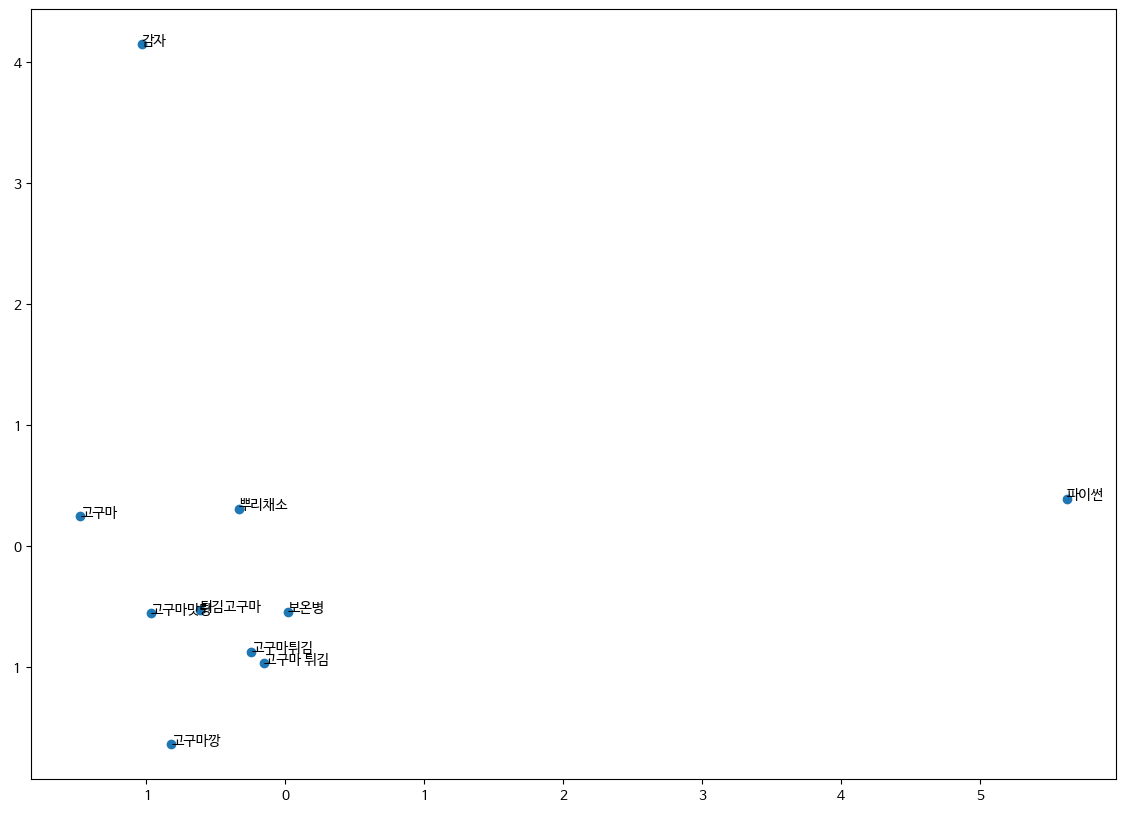

In [ ]:
pca = PCA(n_components=2)
xys = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])
xs = xys[:,0]
ys = xys[:,1]
plt.figure(figsize=(14, 10));
plt.scatter(xs, ys, marker='o');
for i, v in enumerate(words):
    plt.annotate(v, xy=(xs[i], ys[i]));